In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

def runge_function(x):
    return 1 / (1 + 25 * x**2)

X = np.linspace(-1, 1, 1000).reshape(-1, 1).astype(np.float32)
y = runge_function(X).astype(np.float32)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

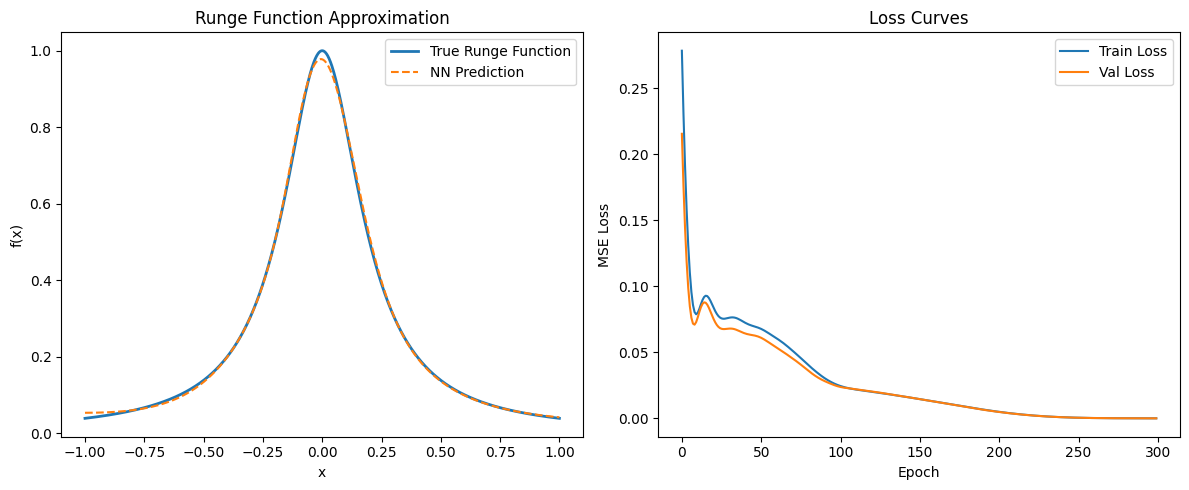

Number of parameters: 33
MSE: 0.000050
Max Error: 0.024401


In [ ]:
class SimpleNettanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 4),
            nn.Tanh(),
            nn.Linear(4, 4),
            nn.Tanh(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = SimpleNettanh()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 s
train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")

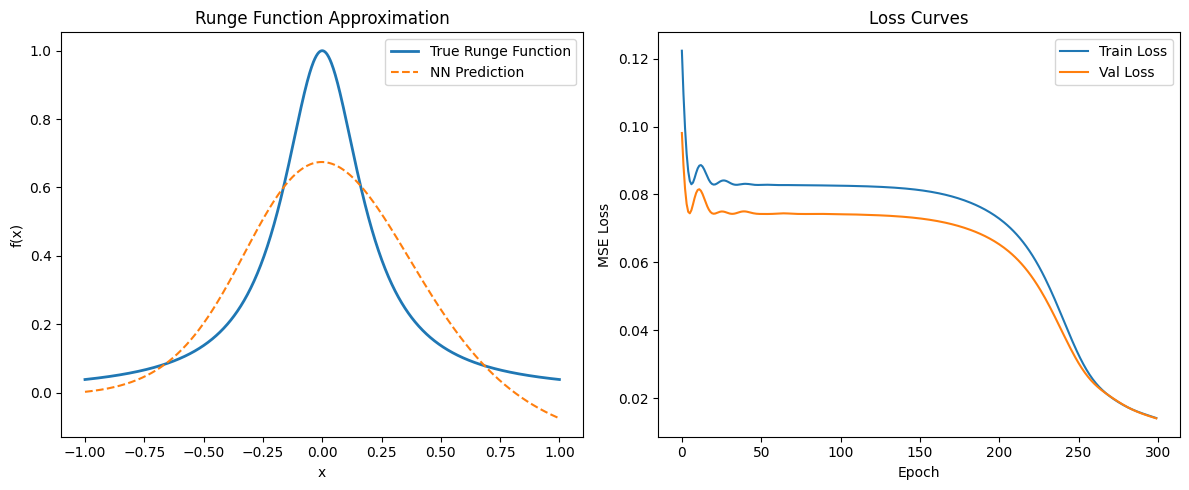

Number of parameters: 33
MSE: 0.014015
Max Error: 0.325490


In [16]:
class SimpleNetsigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 4),
            nn.Sigmoid(),
            nn.Linear(4, 4),
            nn.Sigmoid(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = SimpleNetsigmoid()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")

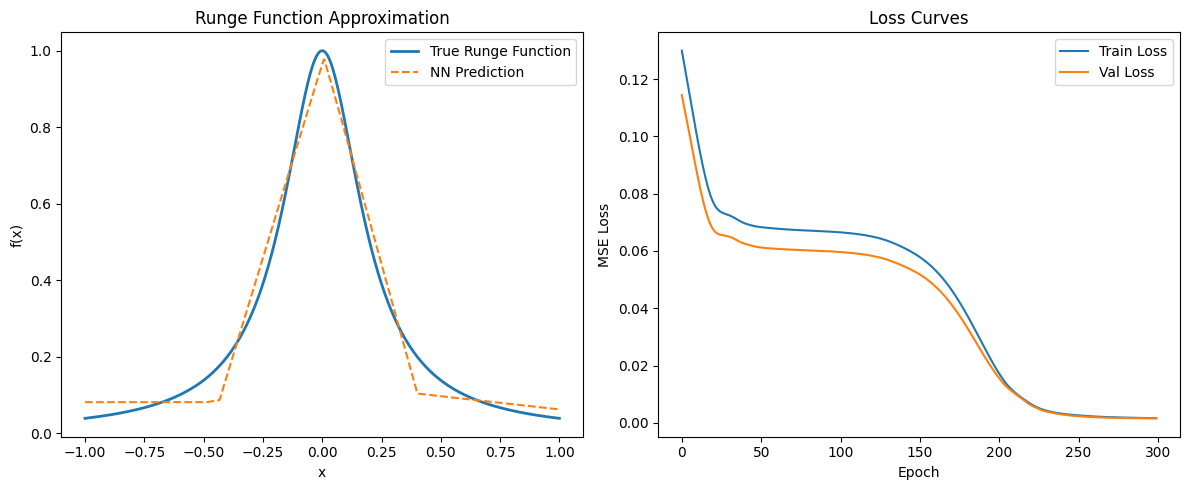

Number of parameters: 33
MSE: 0.001648
Max Error: 0.095644


In [47]:
class SimpleNetrelu(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = SimpleNetrelu()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.006)

train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")

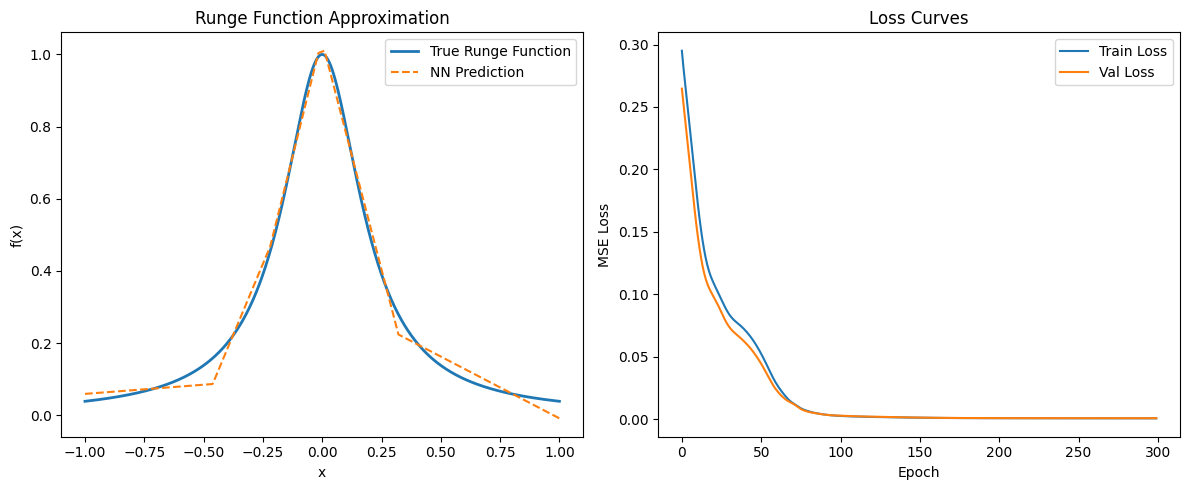

Number of parameters: 33
MSE: 0.000612
Max Error: 0.071130


In [19]:
class SimpleNetleaky(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = SimpleNetleaky()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")

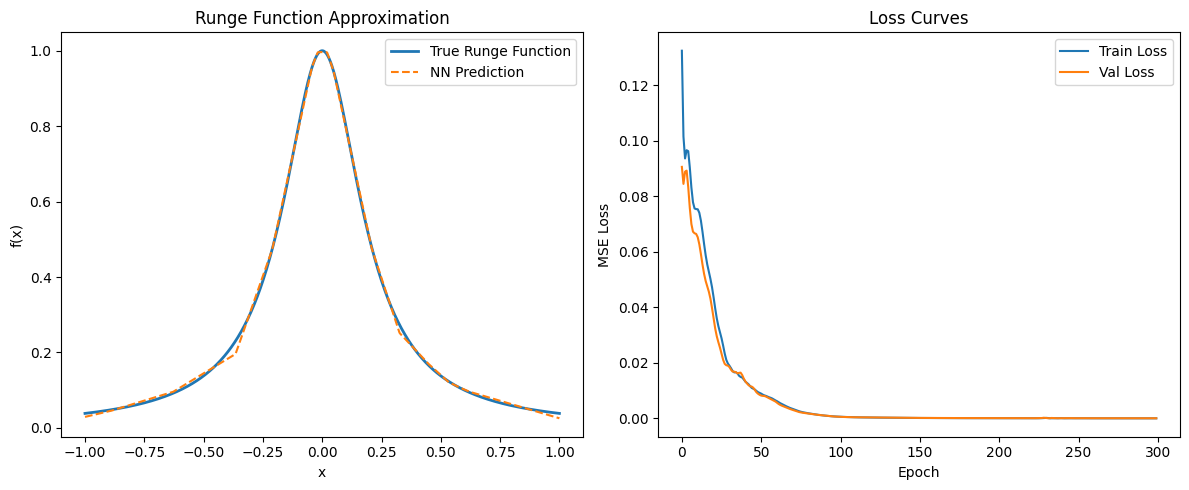

Number of parameters: 321
MSE: 0.000058
Max Error: 0.034589


In [40]:
class NetRelu(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = NetRelu()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")

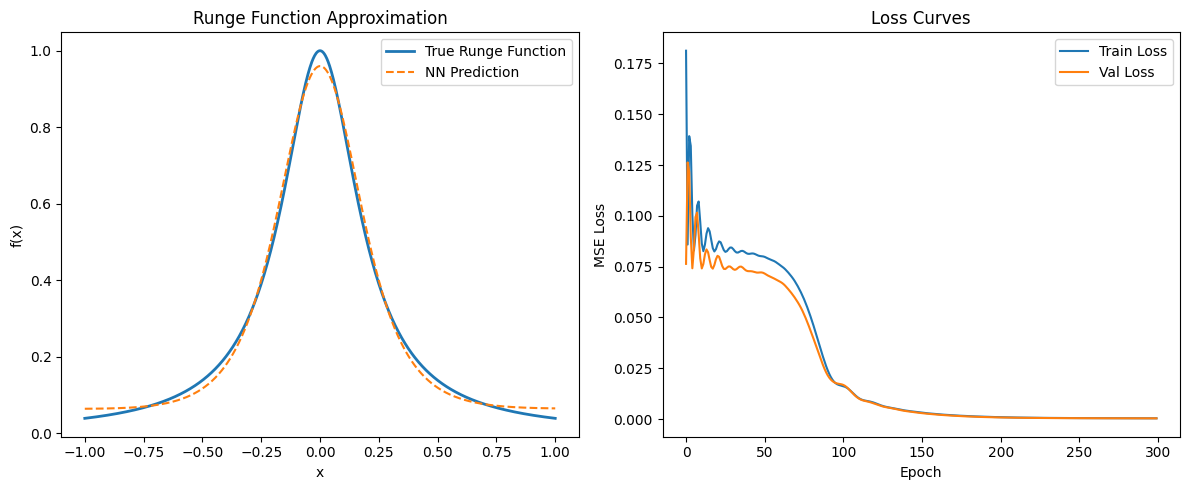

Number of parameters: 321
MSE: 0.000333
Max Error: 0.040241


In [39]:
class NetSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.Sigmoid(),
            nn.Linear(16, 16),
            nn.Sigmoid(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = NetSigmoid()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

train_losses, val_losses = [], []

for epoch in range(300):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X)
    y_pred_all = model(X_all_tensor).numpy()

mse = mean_squared_error(y, y_pred_all)
max_error = np.max(np.abs(y - y_pred_all))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, y, label='True Runge Function', linewidth=2)
plt.plot(X, y_pred_all, label='NN Prediction', linestyle='--')
plt.title("Runge Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"MSE: {mse:.6f}")
print(f"Max Error: {max_error:.6f}")